In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Cargamos los archivos

In [9]:
# SScore de los ambientes
ambientes = pd.read_table('scores_ambiente.csv')
ambientes.count()

#Para que la funcion se ejecute se debe terminar con parentesis, 
#de otra forma nos enseña el DataFrame original 

air                       18
built environment          3
host-associated           68
human-associated           1
human-gut                 11
microbial mat|biofilm     66
miscellaneous             25
plant-associated          24
sediment                  38
soil                     210
wastewater|sludge        141
water                    330
dtype: int64

Vamos a quitar los datos asociados a humanos
- human-associated
- human-gut

In [6]:
del ambientes['human-associated']
del ambientes['human-gut']
ambientes.count()

air                       18
built environment          3
host-associated           68
microbial mat|biofilm     66
miscellaneous             25
plant-associated          24
sediment                  38
soil                     210
wastewater|sludge        141
water                    330
dtype: int64

In [10]:
# count() es una founcion. Por eso lleva parentesis.
# por otro lado, columns NO es una funcion, sino un atributo, por eso NO
# lleva parentesis

ambientes.columns

# el atributo regresa una variable, en este caso un Data Series con la
# lista de nombres de las columnas

Index(['air', 'built environment', 'host-associated', 'human-associated',
       'human-gut', 'microbial mat|biofilm', 'miscellaneous',
       'plant-associated', 'sediment', 'soil', 'wastewater|sludge', 'water'],
      dtype='object')

In [12]:
# cargar los datos de los metagenomas con metadatos
meta = pd.read_table('scores_metadata.csv', index_col=0)


Eliminamos los asociados a humano

In [9]:
# esto es un poquito más complejo, por que tenemos que hacer una máscara

mask1 = meta['env_package'] == 'human-gut'
mask2 = meta['env_package'] == 'human-associated'

# unir las máscaras
mask = mask1 | mask2
# invertir (esta operación solo funciona con arreglos binarios)
mask = ~mask

# aplicamos la mascara al dataframe
meta = meta[mask]

## A crear las figuras .... y ya me canse

In [10]:
print("El valor máximo de SScore:")
print(meta.Sscore.max())

print("El valor del percentil al 95%:")
percen95 = np.percentile(meta.Sscore, 95)
print(percen95)

El valor máximo de SScore:
16.711
El valor del percentil al 95%:
15.9552


### Histograma de SScore

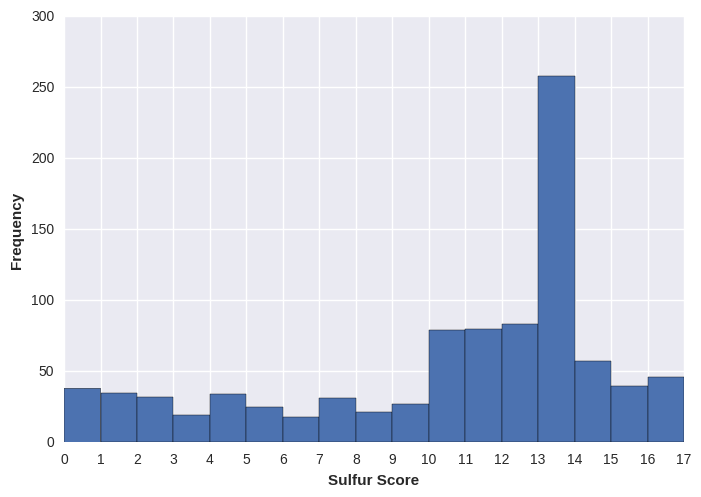

In [11]:
#crea un espacio lineal, limites del histograma
bins = np.linspace(0,17, 18)

meta.Sscore.hist(bins=bins)
plt.xlim((0, 17))
xt = plt.xticks(bins)
plt.xlabel('Sulfur Score', weight='bold')
plt.ylabel('Frequency', weight='bold')

### Boxplot de ambientes

# <font color='crimson'>Cambiar Color maps</font>

Un color map es una especificación de colores consecutivos que pueden usarse para determinar un rango determinado de valores. Por ejemplo la intensidad de algún color en un HeatMap.

En esta liga, puedes ver los color maps disponibles en Matplotlib
http://matplotlib.org/examples/color/colormaps_reference.html

Puedes acceder a los color maps desde el submodulo de matplotlib llamado "cm". Por ejemplo
plt.cm.jet es el color map por omisión.

En la celda de abajo indico la linea de código que cambia el color map (linea 5). En este caso, se llama "spectral". Puedes cambiarlo por alguno de los mostrados en la liga de arriba. El módulo seaborn, contiene color maps adicionales, pero su uso es un poco diferente.

# <font color='orangered'>NOTA</font>
Cambié el color map que tenia seleccionado previamente "Set1" por "spectral". Creo que se distinge mejor, pero la categoría "water" se ve muy claro. Corregí esto cambiando el color para la categoría "water".

El cambio de color está en la linea 11. Tambien es un color gris, pero un poco más obscuro.


In [12]:
# Crear diccionario de colores
env_packages = meta.env_package.unique()
#### La siguiente linea es la que cambia especifica los colores 
# que se usaran de acuerdo al color map especificado
mycolors = plt.cm.spectral(np.linspace(0, 1, len(env_packages)))
###
coldic = {}
for env, col in zip(env_packages, mycolors):
    coldic[env] = col
## Arreglar el color especificiado para water. Tambien es gris, pero mas obscuro
coldic['water'] = [0.5, 0.5, 0.5, 1]
    
    
f_coldic = {}
for feat in meta.feature.unique():
    env_p = meta[meta.feature == feat].iloc[0]['env_package']
    f_coldic[feat] = coldic[env_p]

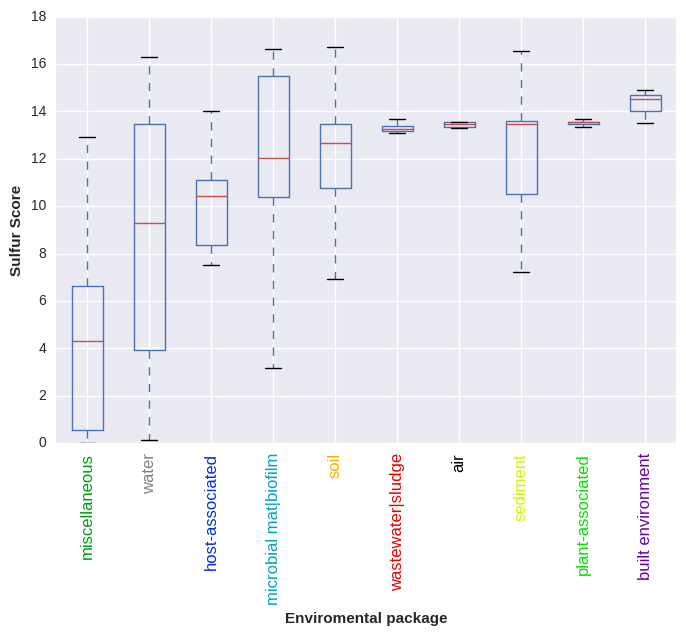

In [13]:
def median_sort(df):
    """Ordena las columnas de un dataframe de pandas 
    de acuerdo a la mediana"""
    median_sorted = df.median().argsort()
    df_sorted = df.T.ix[median_sorted].T
    return df_sorted

ambientes_sorted = median_sort(ambientes)
x = ambientes_sorted.boxplot(rot=90)

plt.xlabel('Enviromental package', weight='bold')
plt.ylabel('Sulfur Score', weight='bold')

myax = plt.gca()
labels = myax.get_xticklabels()
for l in labels:
    l.set_color(coldic[l.get_text()])


### Boxplot de environment feature

In [14]:
feature_ =  meta[['Sscore', 'feature']]
features = feature_['feature'].unique()

mydic = {}
for f in features:
    values = feature_['Sscore'][feature_['feature'] == f]
    values = values.get_values()
    mydic[f] = pd.Series(values)


In [15]:
# lo transformamos a un data frame
env_feature = pd.DataFrame(mydic)


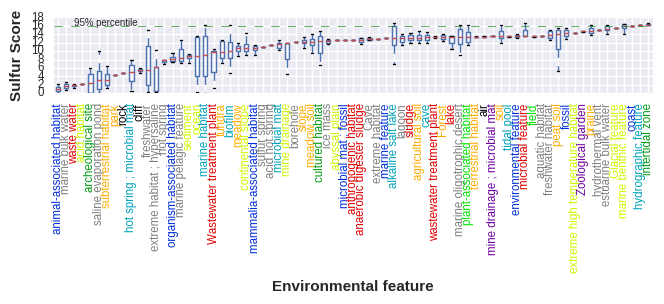

In [16]:
env_f_sorted = median_sort(env_feature)

fig = plt.figure(figsize=(6.8, 3.2))
x = env_f_sorted.boxplot(rot=90)
plt.xticks(size='x-small')
plt.yticks(size='x-small')
plt.xlabel('Environmental feature', weight='bold')
plt.ylabel('Sulfur Score', weight='bold')
plt.axhline(15.9, color='forestgreen', linewidth=0.5, ls='--')
plt.annotate( '95% percentile', (3, 16), fontsize='xx-small')
# esta función ordena mejor los elementos en el lienzo
plt.tight_layout()

myax = plt.gca()
labels = myax.get_xticklabels()
for l in labels:
    l.set_color(f_coldic[l.get_text()])

plt.savefig('prupru.png', dpi=300)

### The planet!!!

In [17]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load metagenome metadata
data = pd.read_pickle('../../metadata/generaldata.pk')
# Homolgating index
meta.index = [str(i) for i in meta.index]
coord = data[['latitude', 'longitude']]
coord = coord.join(meta.Sscore)

# mask for coordenates bad format
f = lambda x : ',' in str(x)
mask_coord = coord.latitude.apply(f)

print('These metagenomes are eliminated because the format of coordenates are different')
print(coord[mask_coord])
print('\n\n')
print('-------------------------------')
print('\n\n')

mask_nan = np.isnan(coord.Sscore)
print('These metagenomes are eliminated because NaN SScore')
print(coord[mask_nan])

# FINAL MASK
mask = mask_coord | mask_nan
print("----\nTotal number of eliminated metagenomes: {}".format(mask.sum()))

These metagenomes are eliminated because the format of coordenates are different
              latitude    longitude  Sscore
metagenome                                 
4461013.3   27.0, 24.7  81.08, 57.8  14.989
4461840.3   27.0, 24.7  81.08, 57.8  16.127



-------------------------------



These metagenomes are eliminated because NaN SScore
                 latitude      longitude  Sscore
metagenome                                      
4489668.3            42.3          -71.1     NaN
4489639.3            42.3          -71.1     NaN
4489632.3            42.3          -71.1     NaN
4440040.3        5.866944      -162.1278     NaN
4489659.3            42.3          -71.1     NaN
4453150.3           36.49        -115.55     NaN
4453148.3           36.49         115.55     NaN
4489651.3            42.3          -71.1     NaN
4489641.3            42.3          -71.1     NaN
4476877.3           51.58           5.38     NaN
4453149.3           36.49        -115.55     NaN
4489653.3       

In [18]:
## Filter and formated values
f_coord = coord[~mask]

# list of longitudes and latitudes
lon = [float(i) for i in f_coord.longitude]
lat = [float(i) for i in f_coord.latitude]


In [19]:
percen_mask = meta.Sscore >= percen95
pm = percen_mask[f_coord.index]

# Ring color array. Used to circle those metagenomes abode the 95 percentile of Sscore
donuts = np.array(['none']*len(f_coord))
donuts[pm.get_values()] = 'blue'


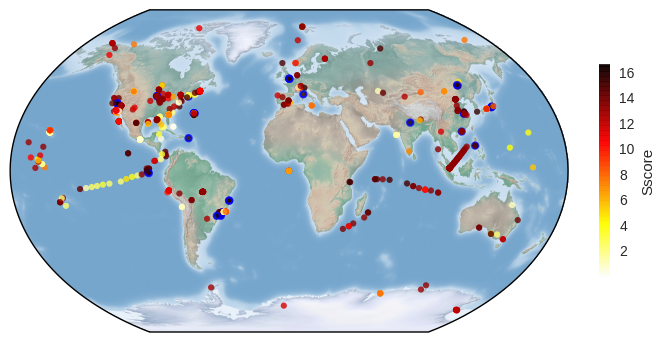

In [20]:
# lon_0 is central longitude of projection.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='kav7',lon_0=0,resolution='c')

# Here we can add figure and figure layout 

# Drwaing map background, can use .bluemarble, .shadedreleaf or .etopo()
m.shadedrelief(scale=0.1)

# NOTAS
# import matplotlib as mpl
# min_ = f_coord.Sscore.min()
# max_ = f_coord.Sscore.max()
# norm = mpl.colors.Normalize(vmin=min_, vmax=max_)
# vals = norm(f_coord.Sscore)

x,y = m(lon, lat)
plt.scatter(x, y, edgecolors=donuts, c=f_coord.Sscore, alpha=0.8, cmap='hot_r', linewidths=1.5)
plt.colorbar(fraction=0.05, shrink=0.5, label='Sscore')



### Legend

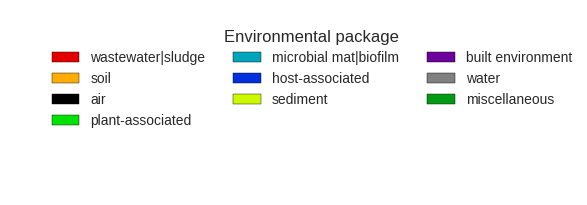

In [22]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

X = 17/2.5
Y = 5/2.5
fig = plt.figure(figsize=(X, Y))

plt.subplot(111)
#patches = []
#for env_p , col in coldic.items():
#    patch = mpatches.Patch(color=col, label=env_p)
#    patches.append(patch)
#plt.gca().legend(patches)

fakexy = (0, 0)
patches = []
labels = []
for env_p , col in coldic.items():
    patch = plt.Rectangle(fakexy, 1, 1, fc=col)
    patches.append(patch)
    labels.append(env_p)
    
plt.legend(patches, labels, ncol=3, title='Environmental package', 
          loc=2)
ax = plt.gca()
ax.axis('off')

plt.savefig('legenda_colores.png', dpi=300)
plt.savefig('legenda_colores.ps', dpi=300, format='ps')

### Figura final

/usr/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


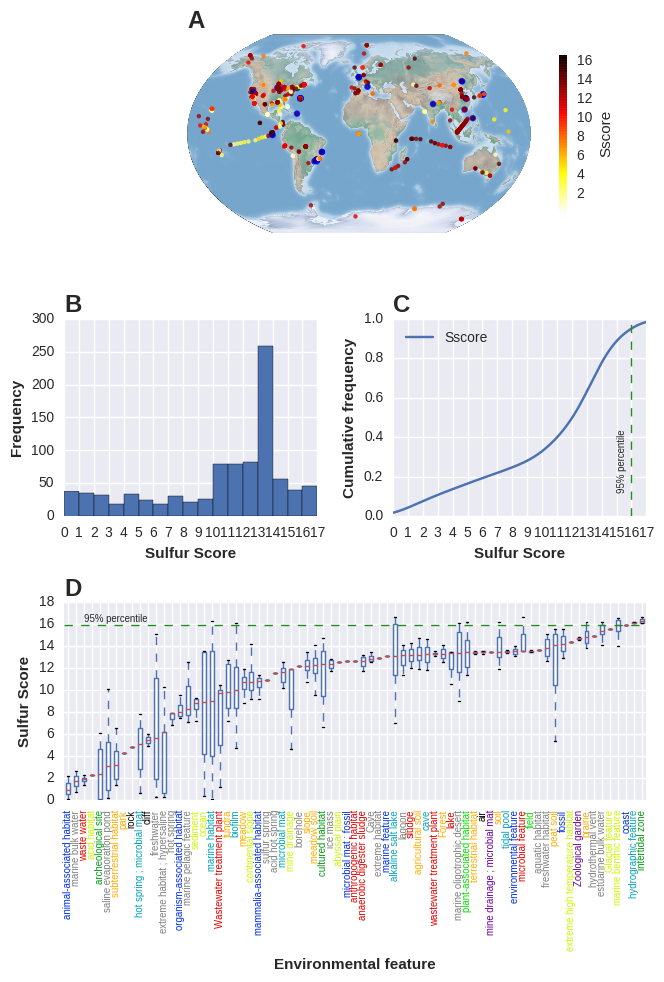

In [25]:
X = 17/2.5
Y = 25/2.5
fig = plt.figure(figsize=(X, Y))

# subplot crea sub gráficas dentro de la figura 
# el númer 221, significa en un esquema de cuadrícula
# 2 filas, 2 columnas, elemento 1

# Map
plt.subplot(311)
m = Basemap(projection='kav7', lon_0=0, resolution='c')
m.drawmapboundary(linewidth=0.5)
m.shadedrelief(scale=0.1)
x,y = m(lon, lat)
plt.scatter(x, y, 10, edgecolors=donuts, c=f_coord.Sscore, alpha=0.8, cmap='hot_r', linewidths=1.5) #edgecolors='none',
plt.colorbar(fraction=0.15, shrink=0.8, pad=0.05, label='Sscore')
plt.title('A', fontweight='bold', fontsize='x-large', loc='left')

# Histogram
plt.subplot(323)
bins = np.linspace(0,17, 18)
meta.Sscore.hist(bins=bins)
plt.xlim((0, 17))
xt = plt.xticks(bins)
plt.xlabel('Sulfur Score', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.title('B', fontweight='bold', fontsize='x-large', loc='left')


# Cummulative histogram
plt.subplot(324)
sns.kdeplot(meta.Sscore, cumulative=True)
plt.xlim((0, 17))
plt.axvline(percen95, color='forestgreen', linewidth=1, ls='--')
xt = plt.xticks(bins)
plt.xlabel('Sulfur Score', weight='bold')
plt.ylabel('Cumulative frequency', weight='bold')
plt.annotate( '95% percentile', (15, 0.4), fontsize='xx-small', rotation=90)
plt.title('C', fontweight='bold', fontsize='x-large', loc='left')


# boxplot
plt.subplot(313)
x = env_f_sorted.boxplot(rot=90)
plt.xticks(size='xx-small')
#plt.yticks(size='x-small')
plt.xlabel('Environmental feature', weight='bold')
plt.ylabel('Sulfur Score', weight='bold')
plt.axhline(percen95, color='forestgreen', linewidth=1, ls='--')
plt.annotate( '95% percentile', (3, 16.2), fontsize='xx-small')
# esta función ordena mejor los elementos en el lienzo
plt.title('D', fontweight='bold', fontsize='x-large', loc='left')


myax = plt.gca()
labels = myax.get_xticklabels()
for l in labels:
    l.set_color(f_coldic[l.get_text()])


plt.tight_layout()
plt.savefig('sulfur_score_meta.png', dpi=300)
plt.savefig('sulfur_score_meta.ps', dpi=300, format='ps')

In [24]:
percenmask = 

SyntaxError: invalid syntax (<ipython-input-24-abeed66584f9>, line 1)